In [36]:
import matplotlib.pyplot as plt
import numpy as np


## Read data and save in X and y


In [37]:
def read_libsvm_format(file_path):
    X, y = [], []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            y.append(float(parts[0]))  
            features = {}
            for item in parts[1:]:
                index, value = item.split(":")
                features[int(index)] = float(value)
            X.append(features)
    return X, y

X, y = read_libsvm_format('cpusmall_scale')


## Initialization

In [38]:
out_sample_error_lin = []   
out_sample_error_poly = []  
lin_sub_poly_error = [] 

N = 64     


In [39]:
X[0]

{1: -0.993496,
 2: -0.993043,
 3: -0.850291,
 4: -0.963479,
 5: -0.960727,
 6: -0.900596,
 7: -0.96642,
 8: -0.863996,
 9: -0.606175,
 10: -0.999291,
 11: 0.0811894,
 12: 0.651101}

## Transfrom data type

In [40]:
def convert_dtype(X):               
    X_arr = []
    for element in X:
        input_vector = np.zeros(12)
        for index, value in element.items():
            input_vector[index - 1] = value        
        X_arr.append(input_vector)
    return X_arr

## transform function $\Phi()$

We use this function to map the orignal data into a higher dimensional space, and save the augmented input vectors in `X_aug_arr`.
Which means that each of the element in `X_aug_arr` is a 37-dimensional vector (12 features + 1 constant + 12 squared features + 12 cubed features).

In [41]:
def Phi(X_arr):
    X_aug_arr = []
    for arr in X_arr:
        Phi_arr = np.concatenate((np.array([1]), arr, arr**2, arr**3))
        X_aug_arr.append(Phi_arr)
    return np.array(X_aug_arr)


## Generate random indices

In [42]:
def generate_random_sample(seed):
    np.random.seed(seed)
    random_sample_indices = np.random.choice(len(X), N, replace=False)

    return random_sample_indices

## Generate out of sample indices

In [43]:
def generate_out_of_sample_ind(sample_indices):
    return [i for i in range(len(X)) if i not in sample_indices]

## get weight vector

In [44]:
def weight_vector(X_in_sample_mat_lin, y_in_sample_array, X_in_sample_mat_poly):

    w_lin = np.linalg.inv(X_in_sample_mat_lin.T @ X_in_sample_mat_lin) @ X_in_sample_mat_lin.T @ y_in_sample_array
    w_poly = np.linalg.inv(X_in_sample_mat_poly.T @ X_in_sample_mat_poly) @ X_in_sample_mat_poly.T @ y_in_sample_array
    return w_lin , w_poly


## out of sample error

In [45]:
def out_of_sample_error(X_out_of_sample_mat_lin, X_out_of_sample_mat_poly, y_out_of_sample_array, w_lin, w_poly):

    out_of_sample_error_lin = np.mean((X_out_of_sample_mat_lin @ w_lin - y_out_of_sample_array) ** 2)
    out_of_sample_error_poly = np.mean((X_out_of_sample_mat_poly @ w_poly - y_out_of_sample_array) ** 2)
    return out_of_sample_error_lin, out_of_sample_error_poly



## Main function

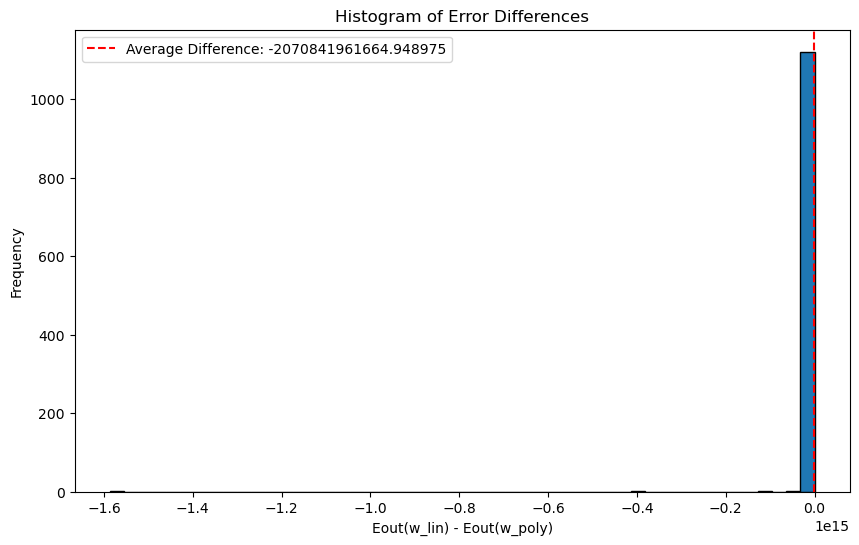

In [46]:
for experiment in range(1126):

    seed = experiment
    random_sample_indices = generate_random_sample(seed)

    X_sample = [X[i] for i in random_sample_indices]
    y_sample = [y[i] for i in random_sample_indices]

    X_in_sample_mat_lin = np.array(convert_dtype(X_sample))
    X_in_sample_mat_poly = Phi(convert_dtype(X_sample))

    y_in_sample_array = np.array(y_sample)

    out_ind = generate_out_of_sample_ind(random_sample_indices)

    X_out_of_sample = [X[i] for i in out_ind]
    y_out_of_sample = [y[i] for i in out_ind]

    X_out_of_sample_mat_lin = np.array(convert_dtype(X_out_of_sample))
    X_out_of_sample_mat_poly = Phi(convert_dtype(X_out_of_sample)) 

    y_out_of_sample_array = np.array(y_out_of_sample)

    w_lin, w_poly = weight_vector(X_in_sample_mat_lin, y_in_sample_array, X_in_sample_mat_poly)
    out_of_sample_error_lin, out_of_sample_error_poly = out_of_sample_error(X_out_of_sample_mat_lin, X_out_of_sample_mat_poly, y_out_of_sample_array, w_lin, w_poly)

    out_sample_error_lin.append(out_of_sample_error_lin)
    out_sample_error_poly.append(out_of_sample_error_poly)
    lin_sub_poly_error.append(out_of_sample_error_lin - out_of_sample_error_poly)
    avg_difference = np.mean(lin_sub_poly_error)


plt.figure(figsize=(10, 6))
plt.hist(lin_sub_poly_error, bins=50, edgecolor='black')
plt.axvline(x=avg_difference, color='r', linestyle='--', 
            label=f'Average Difference: {avg_difference:.6f}')
plt.xlabel('Eout(w_lin) - Eout(w_poly)')
plt.ylabel('Frequency')
plt.title('Histogram of Error Differences')
plt.legend()
plt.show()

In [47]:
out_sample_error_lin[:5]

[1708.699276780023,
 1877.2160952720012,
 163.78540276407384,
 114.3175734727709,
 1009.8283299017055]

In [48]:
out_sample_error_poly[:5]

[22995259.971605998,
 136459361855.26314,
 3974050510.3069034,
 76464752292.44716,
 84134057.37839217]

In [49]:
lin_sub_poly_error[:5]

[-22993551.27232922,
 -136459359978.04704,
 -3974050346.5215006,
 -76464752178.1296,
 -84133047.55006227]